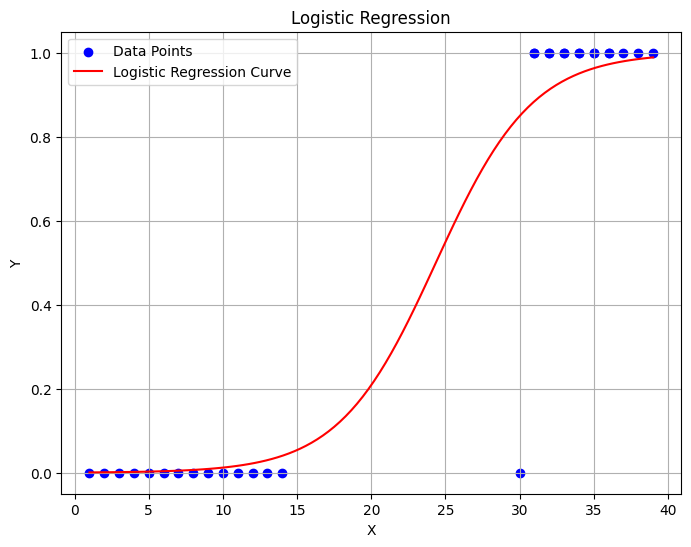

In [149]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 31, 32, 33, 34, 35, 36])
Y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Perform logistic regression

# Define the sigmoid (logistic) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize weights and bias
theta = np.zeros(2)

# Feature scaling
X_scaled = (X - np.mean(X)) / np.std(X)

# Add a column of ones to X to represent the bias term
X_with_bias = np.column_stack((np.ones(len(X)), X_scaled))

# Define the hypothesis function for logistic regression
def hypothesis(theta, X):
    return sigmoid(np.dot(X, theta))

# Define the cost function for logistic regression
def cost_function(theta, X, y):
    m = len(y)
    h = hypothesis(theta, X)
    return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

# Define the gradient descent function for logistic regression
def gradient_descent(theta, X, y, alpha, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        h = hypothesis(theta, X)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        costs.append(cost_function(theta, X, y))
    return theta, costs

# Perform gradient descent
alpha = 0.1
iterations = 1000
theta, costs = gradient_descent(theta, X_with_bias, Y, alpha, iterations)

# Plotting logistic regression
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data Points')
x_values = np.linspace(min(X), max(X), 100)
x_values_scaled = (x_values - np.mean(X)) / np.std(X)
x_values_with_bias = np.column_stack((np.ones(len(x_values)), x_values_scaled))
predicted_probs = hypothesis(theta, x_values_with_bias)
plt.plot(x_values, predicted_probs, color='red', label='Logistic Regression Curve')
plt.title('Logistic Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
